## Mathematics of Machine Learning

### Chapter 3: Linear classification methods

### Section 3.5: Kernel SVM Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rc('font', size=14)
from sklearn import svm
from sklearn.metrics import accuracy_score

#### (0) Data Preparation

In [2]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')

# print(x)
# print(x.shape)
# print(y)
# print(y.shape)

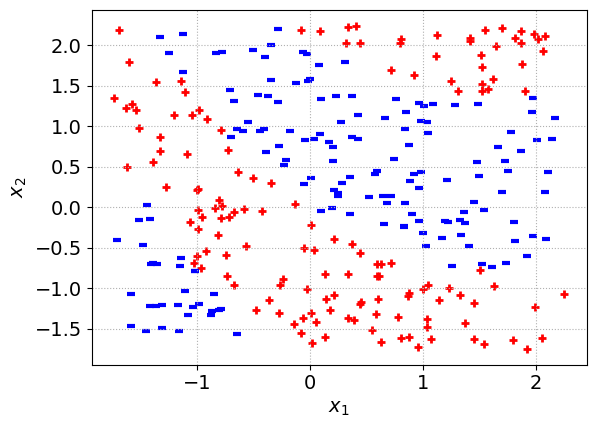

In [3]:
# Plot the training data

fig, ax = plt.subplots(figsize = (6,4.5))

indp = np.where(y==1) # or: [i for (i, val) in enumerate(y) if val == 1]
indm = np.where(y==-1)

ax.scatter(x[0][indp], x[1][indp], c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="b", marker="_", linewidths = 3)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.grid(linestyle='dotted')
#ax.set(xlim=(-3, 3), ylim=(-3, 3))
fig.tight_layout()
plt.show()

#### (1) Soft Kernel SVM rule (Gaussian kernel)

In [10]:
# Lambda for Soft Rule
m = len(y)
lam = 0.5/m

# Create a support vector classifier using Gaussian kernel ('rbf') and gamma = 4
KSVM = svm.SVC(C = 0.5/m/lam, kernel='rbf', gamma = 4)

# Learn on the train subset
KSVM.fit(x.T, y)

# Output parameters
KSVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 4,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
# Access the support vectors and coefficients
support_vectors = KSVM.support_vectors_
print(support_vectors.shape)

# Learned coefficients
alpha_S = KSVM.dual_coef_
print(alpha_S.shape)

b_S = KSVM.intercept_
print(b_S)

(110, 2)
(1, 110)
[0.05582932]


#### (1.1) Plot the learned hypothesis

In [12]:
x_min = -1.75
x_max = 2.25
y_min = -1.75
y_max = 2.25

XX1, XX2 = np.mgrid[x_min:x_max + 4/500:4/500, y_min:y_max + 4/500:4/500]

# Decision function
Z = KSVM.decision_function(np.column_stack( (XX1.ravel(), XX2.ravel()) ))
print('Z', Z)

Z = Z.reshape(XX1.shape)

Z [-0.49652658 -0.50712306 -0.51764908 ...  0.72409955  0.71791967
  0.71148266]


#### (1.2) Plot the decision boundaries

In [ ]:
x1 = XX1[:, 0]

plt.rc('font', size=18)

# Plotting
fig, ax = plt.subplots()

indp = np.where(y==1) # or: [i for (i, val) in enumerate(y) if val == 1]
indm = np.where(y==-1)

# Plot learned decision boundary
ax.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"

# Plot true decision boundary
ax.plot(x1, (x1**2 - 3*x1 - 2*0)/3, '-k', label = "Truth", lw=3)
ax.plot(x1, (x1**2 - 3*x1 - 2*np.pi)/3, '-k', lw=3)
ax.plot(x1, (x1**2 - 3*x1 + 2*np.pi)/3, '-k', lw=3)

# Plot support vectors
line1 = ax.plot(support_vectors[:, 0], support_vectors[:, 1], c= "grey", marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

ax.scatter(x[0][indp], x[1][indp], c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="b", marker="_", linewidths = 3)


ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

#### (1.3) Plot learned RKHS function

In [ ]:
plt.rc('font', size=16)
fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z-np.max(Z), cmap=cm.coolwarm, linewidth=0)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


# 2D plot

fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z-np.max(Z), cmap=cm.coolwarm, linewidth=0)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Plot decision boundary
plt.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"
ax.set_zticks([])
ax.view_init(90,-90)
plt.show()

Out of interest we generate analogous plots for the known true hypothesis $f^\dagger(x) = \sin(0.5x_1^2 - 1.5x_1 - 1.5x_2)$

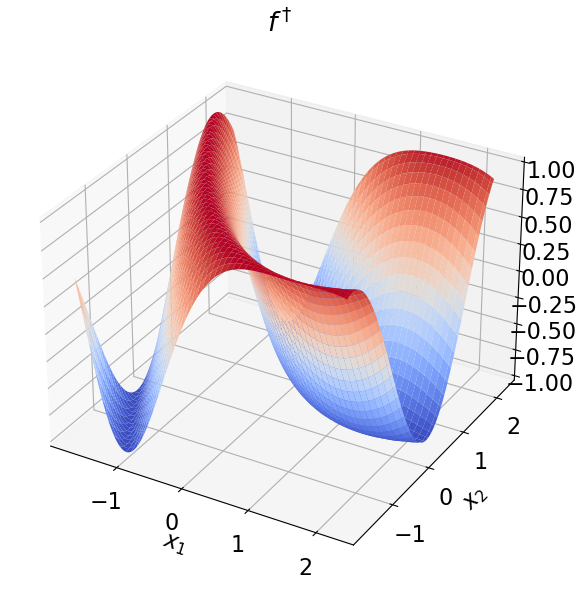

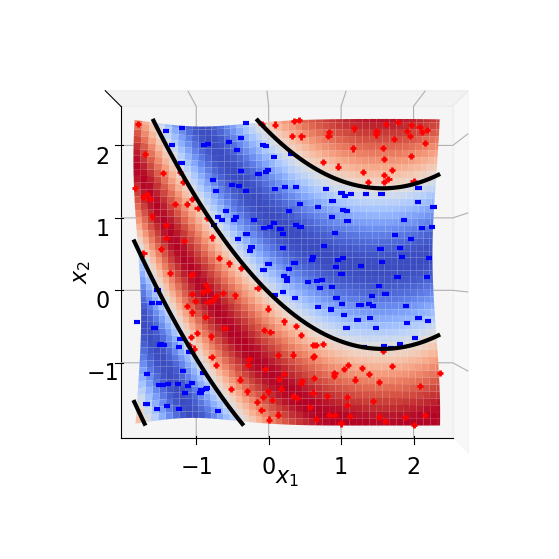

In [15]:
# Plot the true function just for comparison
f_true = lambda x1, x2: np.sin( 0.5 * (x1**2 - 3*x1 - 3*x2))
Z_true = f_true(XX1.ravel(), XX2.ravel())
Z_true = Z_true.reshape(XX1.shape)

plt.rc('font', size=16)
fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z_true, cmap=cm.coolwarm, linewidth=0)
plt.title("$f^\dagger$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# 2D plot

fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z_true-np.max(Z_true), cmap=cm.coolwarm, linewidth=0)

ax.scatter(x[0][indp], x[1][indp], 0, c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], 0, c="b", marker="_", linewidths = 3)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Plot decision boundary
plt.contour(XX1, XX2, Z_true, levels = 0, linewidths=3, colors="black")  # label = "$h_S$"
ax.set_zticks([])
ax.view_init(90,-90)
plt.show()

#### (2) Gamma study (Gaussian kernel)

In [ ]:
# Scaling parameter
gamma = 40*4
gamma = 4/40

In [ ]:
# Create a support vector classifier
KSVM_kappa = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=gamma)

# Learn on the train subset
KSVM_kappa.fit(x.T, y)

# Get support vectors
support_vectors_kappa = KSVM_kappa.support_vectors_

In [ ]:
# Evaluate decision function f_s at grid points
Z = KSVM_kappa.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
Z = Z.reshape(XX1.shape)

In [ ]:
# Plotting

fig, ax = plt.subplots()

indp = np.where(y==1) # or: [i for (i, val) in enumerate(y) if val == 1]
indm = np.where(y==-1)


# Plot learned dividing lines
ax.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"

ax.scatter(x[0][indp], x[1][indp], c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="b", marker="_", linewidths = 3)

# Plot support vectors
line1 = ax.plot(support_vectors[:, 0], support_vectors[:, 1], c= "grey", marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f'$ \gamma $ = {gamma:.2f}', fontsize=20)
ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

#### (3) Lambda study (Gaussian kernel)

In [ ]:
# Lambda for Soft Rule
lam = 20 * 0.5/m
#lam = 0.5/m / 100

In [ ]:
# Scaling parameter
gamma = 4

# Create a support vector classifier
KSVM_lam = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma = gamma)

# Learn on the train subset
KSVM_lam.fit(x.T, y)

# Get support vectors
support_vectors_lam = KSVM_lam.support_vectors_

In [ ]:
# Evaluate decision function f_s at grid points
Z = KSVM_lam.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
Z = Z.reshape(XX1.shape)

In [ ]:
# Plotting

fig, ax = plt.subplots()

indp = np.where(y==1) # or: [i for (i, val) in enumerate(y) if val == 1]
indm = np.where(y==-1)


# Plot learned dividing lines
ax.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"

ax.scatter(x[0][indp], x[1][indp], c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="b", marker="_", linewidths = 3)

# Plot support vectors
line1 = ax.plot(support_vectors[:, 0], support_vectors[:, 1], c= "grey", marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f'$ \lambda $ = {lam:.6f}', fontsize=20)
ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

#### (4) Polynomial kernel

In [ ]:
# Parameters
lam = 0.5/m
gamma = 1
q = 3

# Create a support vector classifier
#KSVM_poly = svm.SVC(C=0.5/m/lam, kernel='poly', gamma=gamma, degree=q, coef0=1)

KSVM_poly = svm.SVC(kernel='poly')

# Learn on the train subset
KSVM_poly.fit(x.T, y)

# Output parameters
KSVM_poly.get_params()

For more information on which kernels are implemented how in Sklearn, see

https://scikit-learn.org/stable/modules/svm.html#kernel-functions

In [ ]:
# Get support vectors
support_vectors_poly = KSVM_poly.support_vectors_

# Decision function
Z = KSVM_poly.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
Z = Z.reshape(XX1.shape)

#### (4.1) Ploting the decision boundaries and the RKHS function

In [ ]:
x1 = XX1[:, 0]

plt.rc('font', size=18)

# Plotting
fig, ax = plt.subplots()

indp = np.where(y==1) # or: [i for (i, val) in enumerate(y) if val == 1]
indm = np.where(y==-1)

# Plot learned dividing lines
ax.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"

# Plot true dividing lines
ax.plot(x1, (x1**2 - 3*x1 - 2*0)/3, '-k', label = "Truth", lw=3)
ax.plot(x1, (x1**2 - 3*x1 - 2*np.pi)/3, '-k', lw=3)
ax.plot(x1, (x1**2 - 3*x1 + 2*np.pi)/3, '-k', lw=3)

# Plot support vectors
line1 = ax.plot(support_vectors[:, 0], support_vectors[:, 1], c= "grey", marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

ax.scatter(x[0][indp], x[1][indp], c="r", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="b", marker="_", linewidths = 3)


ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#plt.title(f'Polynomial Kernel (q={q})', fontsize=20)
ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

Plot the RKHS function $f_s$:

In [ ]:
plt.rc('font', size=16)
fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z-np.max(Z), cmap=cm.coolwarm, linewidth=0)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


# 2D plot

fig, ax = plt.subplots(figsize = (8,7), subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, Z-np.max(Z), cmap=cm.coolwarm, linewidth=0)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Plot decision boundary
plt.contour(XX1, XX2, Z, levels = 0, linewidths=3, colors="lime")  # label = "$h_S$"
ax.set_zticks([])
ax.view_init(90,-90)
plt.show()